# ESTADÍSTICA 2. PRÁCTICA 1.
## Autor: Jesús Octavio Raboso.

Los enunciados del ejercicio aparecerán en color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

<font color='blue'>***Dado el CSV con la serie temporal de datos físico - químicos medidos en el embalse de Cuerda
del Pozo (Soria) durante los años 2014 y 2015, se pide:***</font>
    
   <font color='blue'>1. cargar el dataset;</font>
   
   <font color='blue'>2. seleccionar la conductividad y salinidad de 2014;</font>
   
   <font color='blue'>3. gráfica de salinidad de 2014 vs conductividad de 2014.</font>
    

Cargamos los datos necesarios para la práctica.

In [1]:
data <- read.csv('CdP_practica_estadistica.csv')

Veamos qué contiene:

In [2]:
str(data)

'data.frame':	730 obs. of  10 variables:
 $ date         : Factor w/ 730 levels "01/01/2014 0:03",..: 1 25 49 73 97 121 145 169 193 217 ...
 $ AVG.Temp.    : num  4 4.06 4.13 4.19 4.35 ...
 $ AVG.Press.   : num  9.62 3.94 3.99 3.95 9.39 ...
 $ AVG.Cond.    : num  0.0407 0.0399 0.0377 0.0346 0.0313 ...
 $ AVG.Salinity.: num  0.0304 0.0298 0.0281 0.0257 0.0232 ...
 $ AVG.DO.      : num  13.6 13.6 13.6 13.6 13.5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8.13 8.11 8.05 7.97 7.9 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...


Contiene 730 observaciones de 10 variables.

In [3]:
summary(data)

               date       AVG.Temp.        AVG.Press.       AVG.Cond.      
 01/01/2014 0:03 :  1   Min.   : 2.566   Min.   :-8.776   Min.   :0.03113  
 01/01/2015 0:02 :  1   1st Qu.: 6.973   1st Qu.: 4.122   1st Qu.:0.04166  
 01/02/2014 1:00 :  1   Median :12.116   Median : 7.964   Median :0.05276  
 01/02/2015 0:00 :  1   Mean   :11.754   Mean   : 7.263   Mean   :0.05190  
 01/03/2014 0:05 :  1   3rd Qu.:16.310   3rd Qu.: 8.871   3rd Qu.:0.06205  
 01/03/2015 13:00:  1   Max.   :24.123   Max.   :30.241   Max.   :0.07361  
 (Other)         :724   NA's   :47       NA's   :47       NA's   :47       
 AVG.Salinity.        AVG.DO.            AVG.rawO2.      AVG.OxySat.      
 Min.   :0.02311   Min.   :    0.276   Min.   : 34.22   Min.   :    2.91  
 1st Qu.:0.03002   1st Qu.:    7.247   1st Qu.:565.71   1st Qu.:   72.42  
 Median :0.03542   Median :    9.831   Median :634.83   Median :   93.94  
 Mean   :0.03407   Mean   :   25.561   Mean   :630.73   Mean   :  179.27  
 3rd Qu.:0.03824 

In [4]:
head(data)

date,AVG.Temp.,AVG.Press.,AVG.Cond.,AVG.Salinity.,AVG.DO.,AVG.rawO2.,AVG.OxySat.,AVG.pH.,AVG.Redox.
01/01/2014 0:03,3.997746,9.621590,0.04066501,0.03042613,13.64697,557.8257,104.2490,8.132615,355.7024
02/01/2014 0:05,4.057667,3.944666,0.03989884,0.02982348,13.60542,557.2651,104.0947,8.105203,358.5334
03/01/2014 0:05,4.133612,3.991833,0.03766908,0.02809732,13.58907,558.5972,104.1756,8.045604,359.7074
04/01/2014 0:14,4.188685,3.945495,0.03458220,0.02574459,13.57724,559.5497,104.2334,7.972540,361.7077
05/01/2014 0:08,4.346172,9.391423,0.03129767,0.02324373,13.50923,561.2890,104.1373,7.902103,357.6429
06/01/2014 0:05,4.392661,9.359303,0.03112603,0.02310512,13.42513,559.0047,103.6140,7.892637,358.9344


Lo primero que nos interesa es formatear la columna relativa a la fecha y hora de manera adecuada. Echemos un vistazo al formato actual, es decir, en crudo, tal y como estamos cargando desde el .csv:

In [5]:
head(data$date)

[1] 01/01/2014 0:03 02/01/2014 0:05 03/01/2014 0:05 04/01/2014 0:14
[5] 05/01/2014 0:08 06/01/2014 0:05
730 Levels: 01/01/2014 0:03 01/01/2015 0:02 01/02/2014 1:00 ... 31/12/2015 0:00

Vemos que contiene la fecha en formato dia/mes/año y la hora en formato hora:minuto. Para formatearla a nuestro gusto, empleamos la función `as.POSIXct` e indicamos el formato que preferimos. 

Redefinimos la columna `date` en el formato que queremos. 

In [6]:
data$date <- as.POSIXct(data$date, format = '%d/%m/%Y %H:%M')

Para realizar este ejercicio, nos quedamos con el subconjunto de datos recogidos en el año 2014. Para ello, usamos la función `subset()`.

Si bien, existen filas para las que no hay datos. Existen filas cuyos valores son NA. Puesto que no nos interesan, las omitimos con la funcióm `na.omit()`.

In [7]:
data_2014 <- na.omit(subset(data, format(as.Date(date), "%Y") == 2014))
str(data_2014)

'data.frame':	339 obs. of  10 variables:
 $ date         : POSIXct, format: "2014-01-02 00:05:00" "2014-01-03 00:05:00" ...
 $ AVG.Temp.    : num  4.06 4.13 4.19 4.35 4.39 ...
 $ AVG.Press.   : num  3.94 3.99 3.95 9.39 9.36 ...
 $ AVG.Cond.    : num  0.0399 0.0377 0.0346 0.0313 0.0311 ...
 $ AVG.Salinity.: num  0.0298 0.0281 0.0257 0.0232 0.0231 ...
 $ AVG.DO.      : num  13.6 13.6 13.6 13.5 13.4 ...
 $ AVG.rawO2.   : num  557 559 560 561 559 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8.11 8.05 7.97 7.9 7.89 ...
 $ AVG.Redox.   : num  359 360 362 358 359 ...
 - attr(*, "na.action")= 'omit' Named int  10 11 12 13 14 163 164 165 166 167 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...


Obtenemos 339 observaciones de 10 variables.


<font color='blue'>***Considera un modelo de regresión lineal con un “feature” para los datos Salinidad 2014 vs Conductividad 2014. Utilizando como función de coste el cuadrado de la distancia euclídea, calcula de forma analitica, los
coeficientes que minimizan la función de coste.***</font>

En nuestro modelo de regresión lineal sólo hay una característica, luego es del tipo:
$$ y= f(x) = \alpha_{0} + \alpha_{1} \cdot x$$
donde $y = (y_{1},y_{2},...,y_{N})$, $x = (x_{1},x_{2},...,x_{N})$ son vectores, $\alpha_{0},\alpha_{1}\in\mathbb{R}$.


De hecho, si agrupasemos las diferentes medidas de $x$ e  $y$, podríamos expresar la regresión lineal simple en forma matricial:
$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} \\
	1 & x_{2}\\
    \vdots & \vdots \\
	1 & x_{N} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
	\end{bmatrix},
$$
es decir:
$$ y= X\alpha.$$

Nuestro objetivo es determinar los coeficientes de regresión 
$\hat{\alpha_{0}} , \hat{\alpha_{1}}$ que minimicen la medida de error o función de coste que consideremos.


Tomamos como función de coste el cuadrado de la distancia euclídea, esta resulta: 
$$ S(\alpha_{0}, \alpha_{1}) = \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j})^{2}.$$



Los mínimos de una función anulan la derivada, por tanto, derivamos la función de coste e igualamos a 0 para hallar los puntos que la anulan. Dichos puntos serán los mínimos:

$$ \frac{ \partial S}{\partial \alpha_{0}} =
-2 \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j}) = 0,$$
$$ \frac{ \partial S}{\partial \alpha_{1}} =
-2  \sum_{j=1}^{N}(y_{j}-\alpha_{0} - \alpha_{1}x_{j})x_{j} =
0.$$


Si despejamos $\alpha_{0}$ de la primera ecuación, obtenemos:
$$ \hat{\alpha_{0}} = \bar{y} - \hat{\alpha_{1}}\bar{x}.$$


Sustituyendo la expresión anterior para la derivada parcial respecto a $\alpha_{1}$, obtenemos:
$$ \hat{\alpha_{1}} = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^{2}}-\bar{x}^{2}}.$$


Por tanto, la función de coste alcanza el mínimo en $(\hat{\alpha_{0}} , \hat{\alpha_{1}} ).$


En el caso de la regresión lineal simple,
calculamos los puntos que minimizan la función de coste de manera analítica, punto por punto, pues sus fórmulas son fáciles de deducir.

In [8]:
minimize_costs <- function(x, y){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with a single feature (simple linear regression)
    # y = alpha_0 + alpha_1 * x, calculates the regression
    # coefficients so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for simple linear regression.
    #
    # @param x: numeric vector. Feature vector.   Independet variable. 
    # @param y: numeric vector. Predicted vector. Dependent variable.
    #
    # @return numeric array. Points (alphas) where minimum is reached.
    #
    #
    
    y_mean <- mean(y)             # Calculate vector y mean
    x_mean <- mean(x)             # Calculate vector x mean
    xy_mean <- mean(x * y)        # Calculate vector x*y mean
    x_square_mean <- mean(x ^ 2)  # Calculate vector x^2 mean
    
    
    # Calculate points where minimum is reached
    alpha_1 <- (xy_mean - (x_mean * y_mean)) / (x_square_mean - x_mean ^ 2)
    alpha_0 <- y_mean - alpha_1 * x_mean
    
    return(c(alpha_0, alpha_1))
    
}


<font color='blue'>***Caso general. Para los datos Salinidad 2014 vs Conductividad 2014, calcular los coeficientes usando
matrices.***</font>

Si bien, ¿qué ocurre cuando se tiene más de una característica?



Dado un modelo lineal com $M$ características del tipo:
$$ y = f(x_{1},...,x_{M}) = \alpha_{0}+\alpha_{1}x_{1} + \alpha_{2}x_{2}  + ...+ \alpha_{M}x_{M},$$

podemos representarlo matricialmente como:

$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1}^{(1)} & x_{2}^{(1)} & \dots & x_{M}^{(1)} \\
	1 & x_{1}^{(2)} & x_{2}^{(2)} & \dots & x_{M}^{(2)} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{1}^{(N)} & x_{2}^{(N)} & \dots & x_{M}^{(N)} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \vdots \\
    \alpha_{M}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha.$$

Empleando el cuadrado de la distancia euclídea como función de coste, esta resulta:
$$ \textit{Loss} = (y-X\alpha)^{T}(y-X\alpha).$$

Recordemos que el objetivo es encontrar los valores particulares $\hat{\alpha}$ de $\alpha$ que minimizan la función de coste, luego si derivamos la expresión anterior con respecto de $\alpha$ y multiplicamos por $(X^{T}X)^{-1}$, obtenemos:

$$\hat{\alpha} = (X^{T}X)^{-1}X^{T}y.$$


Creamos una función que, operando matricialmente, devuelve los puntos en los que se minimiza el coste:

In [9]:
minimize_costs_general <- function(X, y){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with multiple features 
    # y = alpha * X, calculates regression coefficients alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for linear regression with multiple features.
    #
    # @param X: numeric array.  Features array Independet variable. 
    # @param y: numeric vector. Predicted vector. Dependent variable.
    #
    # @return alphas: numeric array. Alphas where minimum is reached.
    #
    #

    # Calculate alphas that minimize cost function
    alphas <- solve(t(X)%*%X) %*% t(X) %*% y
    
    return(alphas)
}


<font color='blue'>***Función de coste: cuadrado de la distancia euclidea.***</font>


In [10]:
loss <- function(X, y, cp){
    
    #
    # @description Cost function. Square of euclidean distance.
    #
    # @param X: numeric array.  Independent variable. 
    # @param y: numeric vector. Dependent variable
    # @param cp: float. 
    #
    # @return float. Loss function value.
    #
    
    return(as.numeric(t(y - X %*% cp) %*% (y - X %*% cp)))
}


En lo que sigue, tendremos que usar como regresión polinomios de grados 2 y 3,  luego supongamos ahora un modelo no lineal.

En este caso no tiene sentido aplicar un modelo de regresión lineal sin hacer ninguna transformación. 

La relación entre la variable dependiente $y$ y el vector de características $x$ es de tipo polinómico:
$$ y = f(x) = \alpha_{0} + \alpha_{1}\cdot x + \alpha_{2}\cdot x^{2} + ... +\alpha_{n}\cdot x^{n}. $$


Tal y como vimos en la clase teórica, dada una relación $y = f(x) = \alpha_{0} + \alpha_{1}\cdot x + \alpha_{2}\cdot x^{2} +... + \alpha_{n}\cdot x^{n}$  expandimos artificialmente la dimensión de $x$ añadiendo potencias de las propias $x$. En forma matricial, el modelo puede expresarse como:

$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{n} \\
	1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{n} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{N} & x_{N}^{2} & \dots & x_{N}^{n} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \vdots \\
    \alpha_{n}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha$$


Pronto nos será útil la siguiente función. Creamos una función que nos permita evaluar un polinomio conociendo los coeficientes del propio polinomio y el conjunto de  puntos en los que evaluarlo.

In [11]:
polyval <- function(x, coefs){
    
    #
    # Polynomial evaluation
    #
    # @description: y = polyval(x, coefs) evaluates the polynomia
    # whose coefficients are coefs at each point in x. 
    #
    # @param x: numeric vector. Points of evaluation.
    # @param coefs: numeric vector. It is a vector fo length n+1
    # whose elements are the coefficients (in descending powers)
    # of an nth-degree polynomial
    #
    # @return : numeric array. Polynomial evaluation
    #
    
     c(cbind(1, 
             poly(x, degree = length(coefs) - 1, raw = TRUE, simple = TRUE)) %*% coefs)    
}

Creamos la función `regression()` que tomará por input:
* x: variable independiente;
* y: variable dependiente;
* n: grado del polinomio de regresión (una recta se considera polinomio de grado n=1).

Dicha función realiza lo siguiente:
1. Lanzar una excepción si el grado del polinomio es <= 0;
2. Crear un data.frame que será útil para los plots; extraer el año a partir del nombre de la variable;
3. Siguiendo los resultados teóricos, calcular el punto en el que se minimiza la función de coste;
4. Siguiendo los resultados teóricos, calcular el valor de la función de coste;
5. Siguiendo los resultados teóricos, evaluar el polinomio de regresión;
6. Graficar los resultados teóricos obtenidos (nube de puntos, polinomio de regresión);
7. Siguiendo los métodos ya implementados en R, calcular el polinomio de regresión con `glm()`;
8. Graficar los resultados obtenidos con los métodos de R (nube de puntos, polinomio de regresión);
9. Calcular la máxima diferencia entre los valores de los polinomios obtenidos con los resultados teóricos y los métodos de R;
10. Comparar gráficamente el método teórico y el propio de R.
 
Como output, devuelve un vector (tupla) cuya primera coordenada contiene los coeficientes de regresión teóricos; y cuya segunda coordenada contiene el valor de la función de coste.


In [12]:
regression <- function(x, y, n){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependent variable)
    # Let n be the polynomial regression degree. (if n = 1: linear function)
    # 
    # Given a regression with multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # Plot and compare theoretical and computational (R methods) results
    #
    # @description comparision of results for regression .
    #
    # @param x: numeric array. Features array. Independet variable. 
    # @param y: numeric vector. Predicted vector. Dependent variable.
    # @param n: int >= 1. Polynomial regression degree.
    #
    #
    # @return vector. Vector containing data.frame with regression coefficients at index 1
    # and loss functon value at index 2
    #
    
    # Exception for polynomial regression degree: n >= 1
    if (n < 1) {
        stop("Polynomial regression degree must be >= 1")    
    }
    
    # Create df for plots.
    df <- data.frame(x = x, y = y)
      
    # Extract year from variable name
    year <- strsplit( deparse(substitute(x)), split = "_")[[1]][2]


    # THEORETICAL RESULTS 
    
    # Features matrix.
    # The outer product of the arrays 'X' and 'Y' 
    # with dimension c(dim(X), dim(Y)) where element 
    # A[c(arrayindex.x, arrayindex.y)] = FUN(X[arrayindex.x], Y[arrayindex.y], …).
    X <- outer(X = x, Y = 0:n, FUN =  "^")

    # Calculate regression coefficients (alphas) that minimize cost function.
    # Particular case: n=1.
    #    Calculates regression coefficients using the explicit formulas `minimize_costs()` and compares with the 
    #    given by the matrix-like operations ` minimize_costs_general()`.
    # General case: n > 1.
    #    Calculates regression coefficients using the matrix-like formulas `minimize_costs_general()`
    if (n == 1){
        alphas_particular <- minimize_costs(x, y)
        alphas <- minimize_costs_general(X, y)
        # Print results comparison
        for (i in 1:length(alphas)){
            cat(paste('Coefficient', i - 1, 'for x ^', i -1, ': particular function  =', alphas_particular[i], '\n',
                      '                         general function     =', alphas[i], '\n'))
        }
    }
    else{
        alphas <- minimize_costs_general(X, y)
        # Print results
         for (i in 1:length(alphas)){
            cat(paste('Coefficient', i - 1 , 'for x ^', i -1, ' =', alphas[i], '\n'))             
        }
    }
    
    # Calculate and print loss function value
    loss_value <- loss(X, y, alphas)
    cat(paste('Loss function value: ', loss_value))
    
    # Sleeping time. I want to print and plot in order
    Sys.sleep(1)
        
    # Regression using theoretical results.
    # Evaluates polynomial with coefficients equal to the regression coefficients (alphas) at x points.
    reg_theoretical <- polyval(x, alphas)
   
    # Plot points
    plot(y ~ x, pch = 19,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Plot theoretical regression
    lines(sort(x), reg_theoretical[order(x)], col = 'purple', lwd = 2)     
    # Add legend
    legend("bottomright", legend = "Theoretical regression", 
           pch = "|", col = "purple",
           cex = 1.5)
    
    # Time to prepare plot
    Sys.sleep(1)
    
    # COMPUTATIONAL RESULTS

    # Regression using R methods.
    # Calculate curve with glm()
    reg_computational <- glm(y ~ poly(x, n))

    # Plot points
    plot(y ~ x, pch = 19,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Plot regression curve
    lines(sort(x), fitted(reg_computational)[order(x)], col = "green", lwd = 2) 
    # Add legend
    legend("bottomright", legend = "Computational regression (R methods)", 
           pch = "|", col = "green",
           cex = 1.5)
    
    # Time to prepare plot
    Sys.sleep(1)
    
    # THEORETICAL VS COMPUTATIONAL COMPARISON
    
    # Plot theoretical/computational (R methods) results
    plot(y ~ x, pch = 19, cex = 1.2,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Theoretical results
    lines(sort(x), reg_theoretical[order(x)], col = 'purple', lwd = 9)     
    # Results with `R` methods
    lines(sort(x), fitted(reg_computational)[order(x)], col = "green", lwd = 3) 
    # Add legend        
    legend("bottomright", legend=c("Theoretical regression", "Computational regression (R methods)"),
            col=c("purple", "green"),
            lty= 1, cex = 1.25)
    
    # Time to prepare plot
    Sys.sleep(4)
    
    # Our results where stores in variable: `reg`
    # Compare with results given by R functions: `fitted()`
    cat(paste('Maximum difference (theoretical - computational):', max(reg_theoretical - fitted(reg_computational))))

    
    return(c(data.frame(reg_coeffs = alphas), loss_value))
}

### Resultados para el año 2014.

Seleccionamos las variables que nos interesan. La variable independiente será la conductividad y la variable dependiente será la salinidad.

In [13]:
x_2014 <- data_2014$AVG.Cond      # Select independent variable
y_2014 <- data_2014$AVG.Salinity  # Select dependent variable

#### 2014: Regresión con polinomio  de grado 1 (recta).

Coefficient 0 for x ^ 0 : particular function  = 0.0111160971795076 
                          general function     = 0.0111160971795076 
Coefficient 1 for x ^ 1 : particular function  = 0.437214433621522 
                          general function     = 0.437214433621525 
Loss function value:  0.000163603320322888

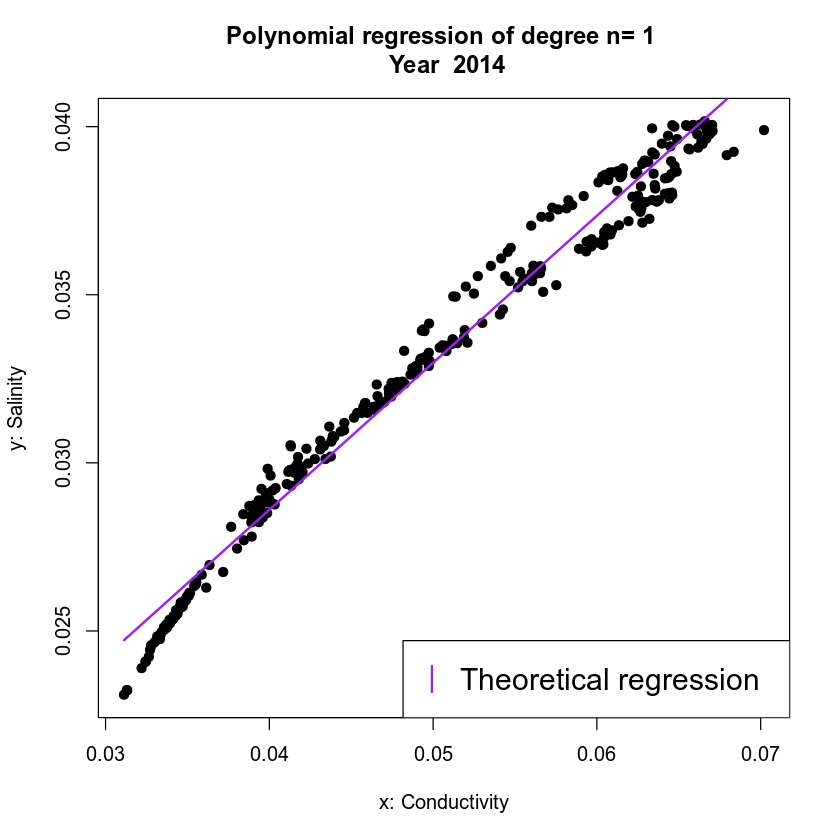

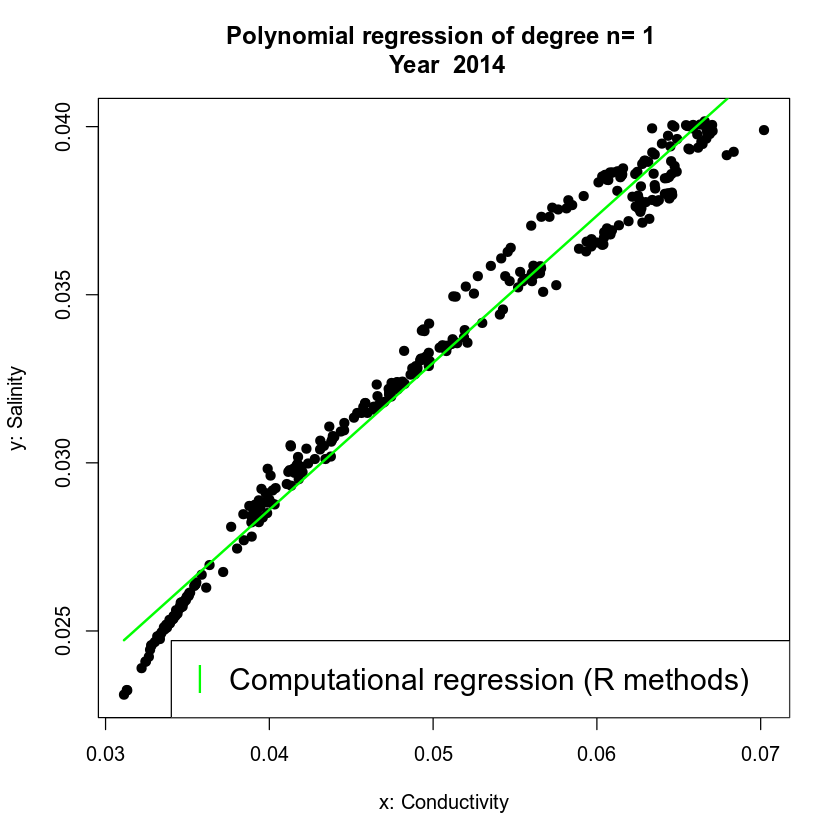

Maximum difference (theoretical - computational): 1.38777878078145e-16

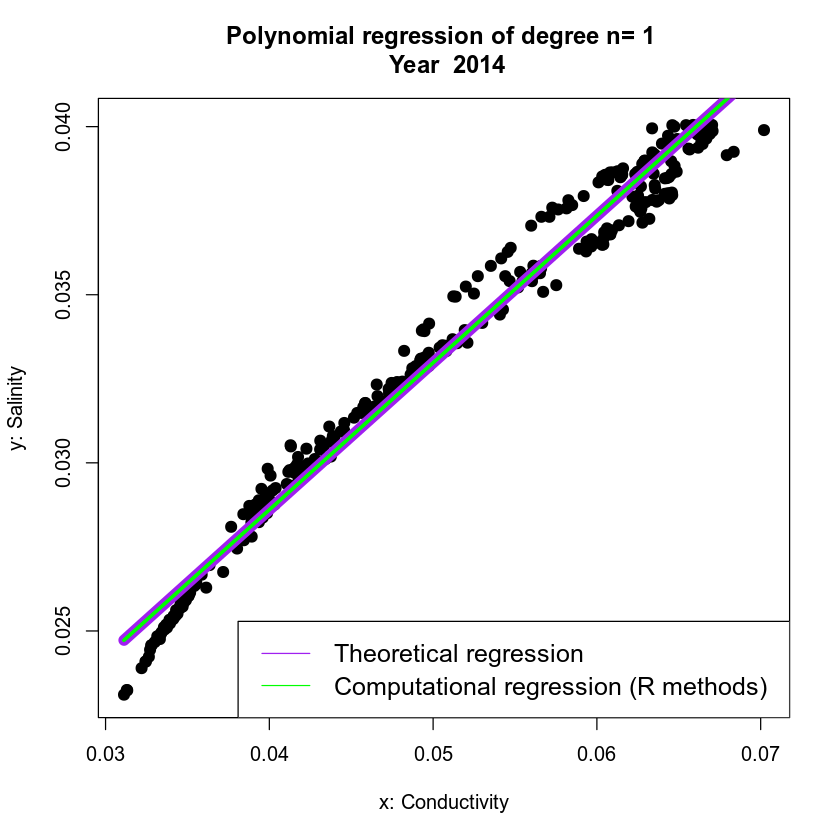

In [14]:
res_2014_1 <- regression(x_2014, y_2014, 1)

#### 2014: regresión con polinomio de grado 2.

Coefficient 0 for x ^ 0  = 0.00043116292783914 
Coefficient 1 for x ^ 1  = 0.889721324410438 
Coefficient 2 for x ^ 2  = -4.55368682003954 
Loss function value:  9.56113450838086e-05

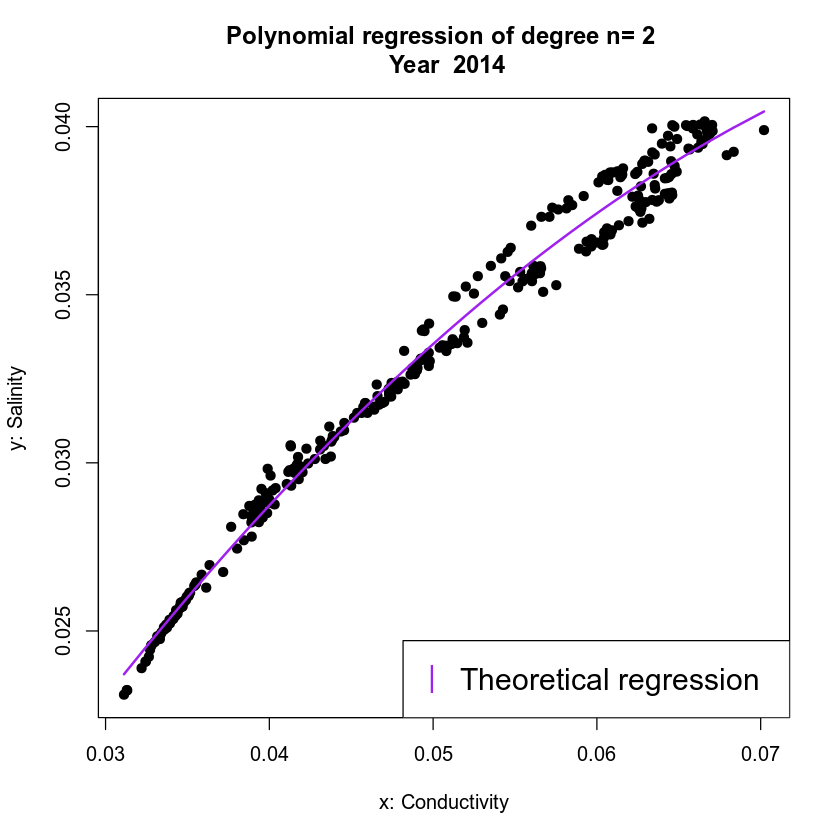

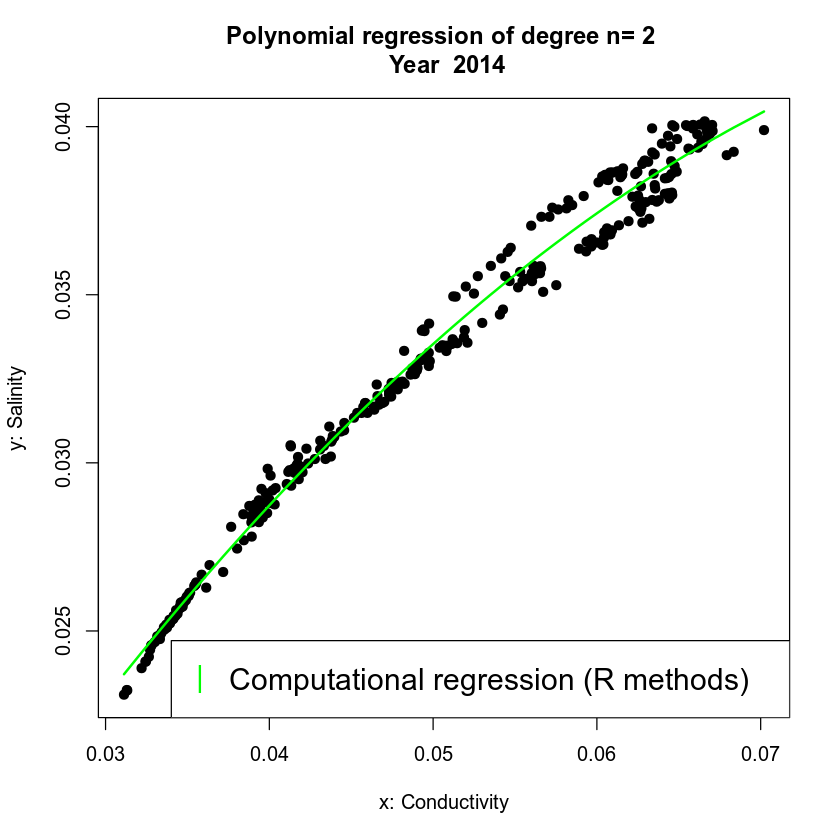

Maximum difference (theoretical - computational): -4.88498130835069e-15

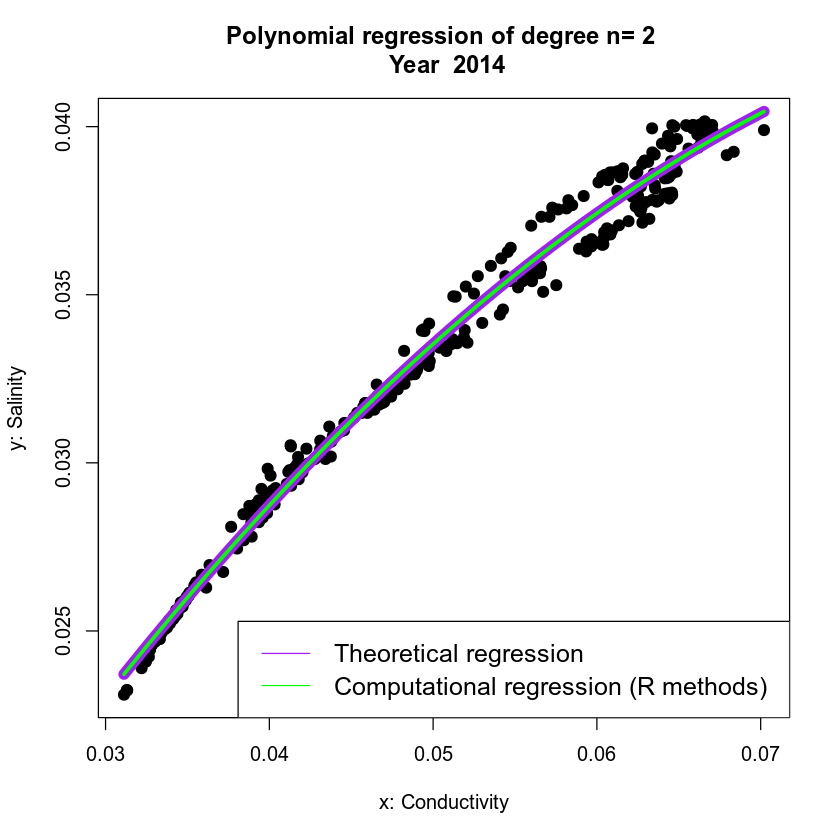

In [15]:
res_2014_2 <- regression(x_2014, y_2014, 2)

#### 2014: regresión con polinomio de grado 3.

Coefficient 0 for x ^ 0  = -0.0113767562893825 
Coefficient 1 for x ^ 1  = 1.64728060639922 
Coefficient 2 for x ^ 2  = -20.275274047382 
Coefficient 3 for x ^ 3  = 105.781056362112 
Loss function value:  9.25314348438058e-05

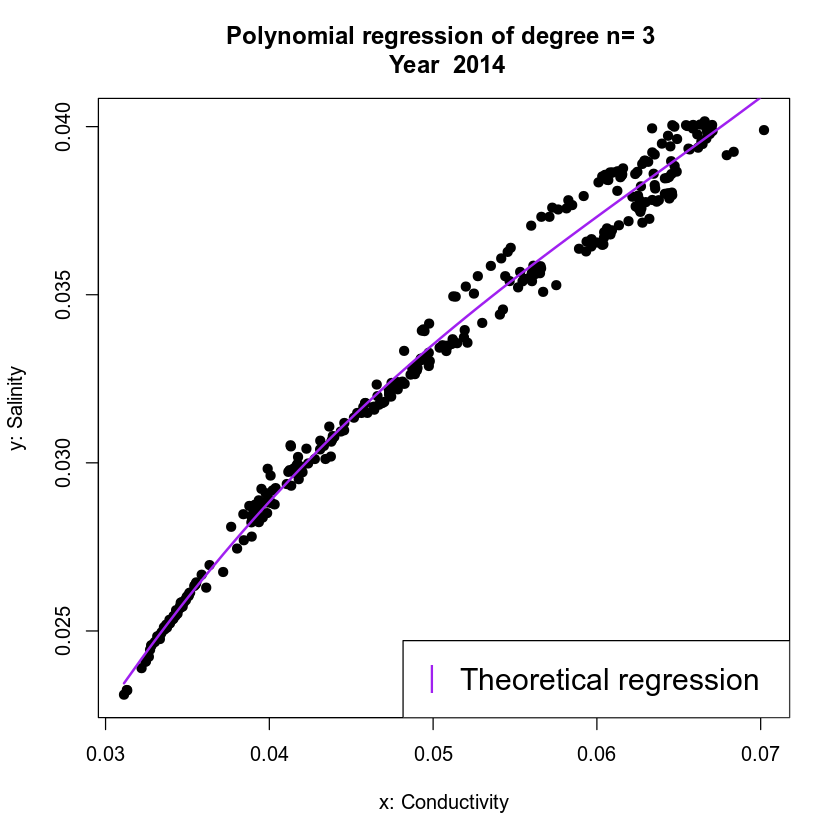

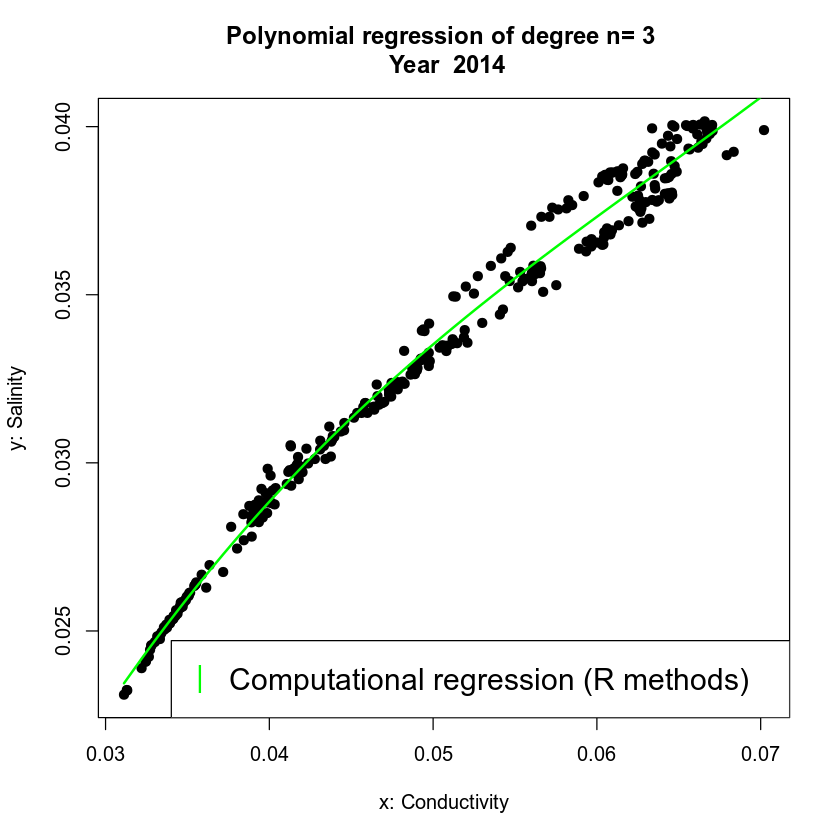

Maximum difference (theoretical - computational): 5.23379950490011e-13

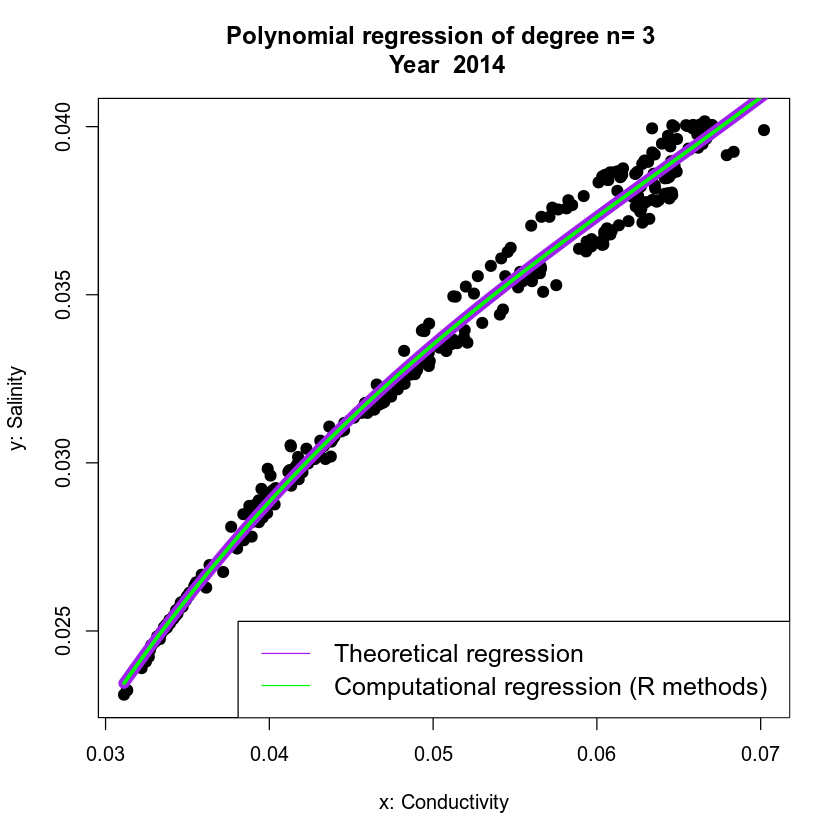

In [16]:
res_2014_3 <- regression(x_2014, y_2014, 3)

¿Cuál es el mejor método de los tres?
Comparamos los valores de la función de coste.

In [17]:
deg <- which.min(c(res_2014_1[[2]], res_2014_2[[2]], res_2014_3[[2]]))
print(paste('BEST METHOD: regression with polynomial of degree n=', deg))

[1] "BEST METHOD: regression with polynomial of degree n= 3"


### Predicción para 2015 con el mejor modelo obtenido para el año 2014.

Con los datos de 2014, hemos obtenido que el mejor modelo (evaluado y testeado en 2014) es la regresión con un polinomio de grado 3. Emplearemos los coeficientes $\hat{\alpha}$ de dicho polinomio para calcular la función de Loss para 2015.

Es decir, hemos entrenado en 2014 y estamos testeando en 2015.

De manera análoga al año 2014, fiiltramos datos para 2015:

In [18]:
data_2015 <- na.omit(subset(data, format(as.Date(date), "%Y") == 2015))
str(data_2015)

'data.frame':	343 obs. of  10 variables:
 $ date         : POSIXct, format: "2015-01-02 00:02:00" "2015-01-03 00:12:00" ...
 $ AVG.Temp.    : num  5.19 5.12 5.07 4.98 4.96 ...
 $ AVG.Press.   : num  8.28 8.3 8.21 8.28 8.26 ...
 $ AVG.Cond.    : num  0.039 0.039 0.0391 0.039 0.039 ...
 $ AVG.Salinity.: num  0.0287 0.0288 0.0289 0.0288 0.0288 ...
 $ AVG.DO.      : num  12.7 12.7 12.8 12.8 12.8 ...
 $ AVG.rawO2.   : num  635 634 636 635 637 ...
 $ AVG.OxySat.  : num  99.8 99.8 100.2 100.3 100.6 ...
 $ AVG.pH.      : num  7.31 7.32 7.32 7.31 7.32 ...
 $ AVG.Redox.   : num  525 525 528 530 530 ...
 - attr(*, "na.action")= 'omit' Named int  58 59 60 61 62 63 64 65 66 67 ...
  ..- attr(*, "names")= chr  "424" "425" "426" "427" ...


In [19]:
x_2015 <- data_2015$AVG.Cond      # Select independent variable
y_2015 <- data_2015$AVG.Salinity  # Select dependent variable

In [20]:
# Build feature matrix up
X_aux <- outer(X = x_2015, Y = 0:3, FUN =  "^")

# Loss functoin value
lv_2015_model_2014 <- loss(X = X_aux, y = y_2015, cp = c(res_2014_3[[1]]))

print(paste('Loss function value for year 2015 with best model for 2014:', lv_2015_model_2014))

[1] "Loss function value for year 2015 with best model for 2014: 0.000391327064871287"


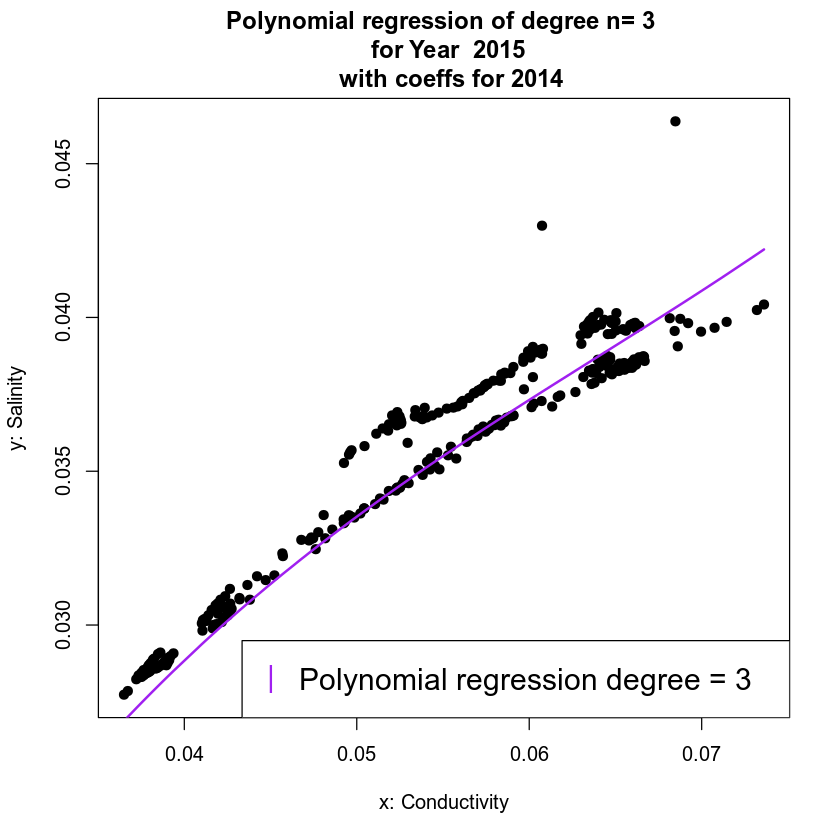

In [21]:
# Plot points for year 2015
plot(y_2015 ~ x_2015, pch = 19,
    main = paste('Polynomial regression of degree n=', 3, "\n", ' for Year ', 2015, "\n", ' with coeffs for', 2014),
    xlab = 'x: Conductivity',
    ylab = 'y: Salinity')

# Plot polynomial with coefficients for the polynomial regression of degree n=3 for 2014
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2014_3[[1]])[order(x_2015)], col = 'purple', lwd = 2)     

legend("bottomright", legend = "Polynomial regression degree = 3", 
           pch = "|", col = "purple",
           cex = 1.5)

### Dados los modelos para 2014, ¿cuál es el que mejor se ajusta a 2015?

¿Es realmente el mejor modelo ajustado en 2014 también el mejor modelo que predice en 2015?

In [22]:
# Loss function values
X_1 <- outer(X = x_2015, Y = 0:1, FUN =  "^")
lv_1 <- loss(X = X_1, y = y_2015, cp = c(res_2014_1[[1]]))
print(paste('Loss function value for year 2015 with polynomial of degree', 1, 'for 2014:', lv_1))
    
X_2 <- outer(X = x_2015, Y = 0:2, FUN =  "^")
lv_2 <- loss(X = X_2, y = y_2015, cp = c(res_2014_2[[1]]))
print(paste('Loss function value for year 2015 with polynomial of degree', 2, 'for 2014:', lv_2))
    
X_3 <- outer(X = x_2015, Y = 0:3, FUN =  "^")
lv_3 <- loss(X = X_3, y = y_2015, cp = c(res_2014_3[[1]]))
print(paste('Loss function value for year 2015 with polynomial of degree', 3, 'for 2014:', lv_3))

[1] "Loss function value for year 2015 with polynomial of degree 1 for 2014: 0.000556413488147513"
[1] "Loss function value for year 2015 with polynomial of degree 2 for 2014: 0.000374927665558949"
[1] "Loss function value for year 2015 with polynomial of degree 3 for 2014: 0.000391327064871287"


In [23]:
deg <- which.min(c(lv_1, lv_2, lv_3))
print(paste('BEST METHOD trained in 2014 and evaluated in 2015: regression with polynomial of degree n=', deg))

[1] "BEST METHOD trained in 2014 and evaluated in 2015: regression with polynomial of degree n= 2"


Plotemos la nube de puntos de 2015. Añadimos el polinomio que tiene los coeficientes del polinomio de regresión de grado 2 entrenado en 2014 pero evaluado en 2015:

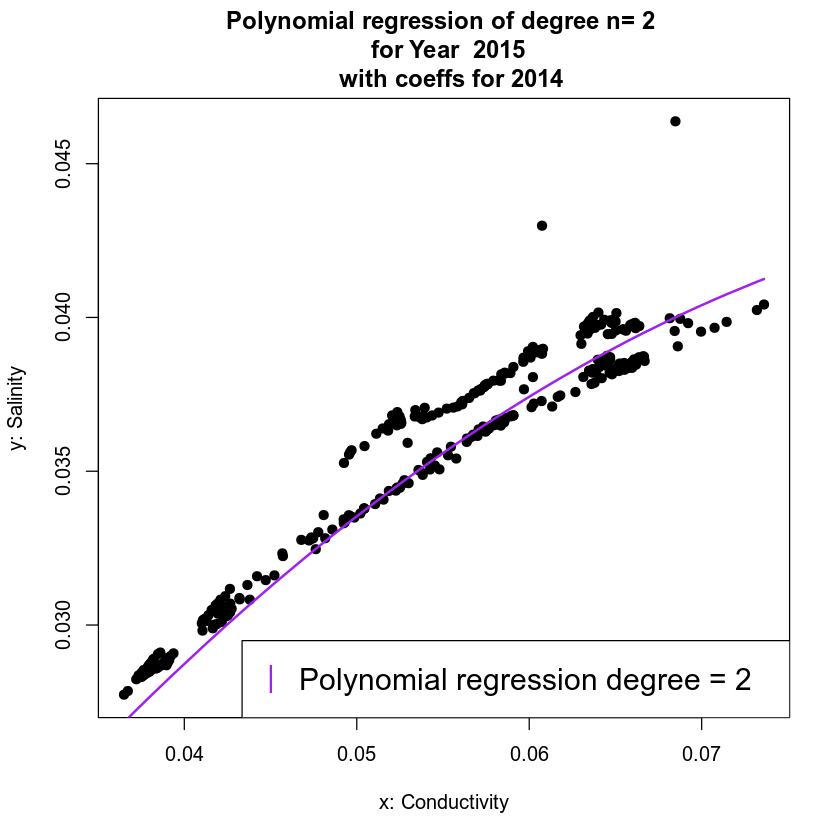

In [24]:
# Plot points for year 2015
plot(y_2015 ~ x_2015, pch = 19,
    main = paste('Polynomial regression of degree n=', 2, "\n", ' for Year ', 2015, "\n", ' with coeffs for', 2014),
    xlab = 'x: Conductivity',
    ylab = 'y: Salinity')

# PLOT FOR BEST MODEL n=2
# Plot polynomial with coefficients for the polynomial refression of degree n=2 for 2014
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2014_2[[1]])[order(x_2015)], col = 'purple', lwd = 2)     

legend("bottomright", legend = "Polynomial regression degree = 2", 
           pch = "|", col = "purple",
           cex = 1.5)

### Resultados para el año 2015.

Repretimos el ejercicio de 2014 pero para el año 2015. 

#### 2015: regresión con polinomio de grado 1.

Coefficient 0 for x ^ 0 : particular function  = 0.0145776110341287 
                          general function     = 0.0145776110341291 
Coefficient 1 for x ^ 1 : particular function  = 0.382743761600795 
                          general function     = 0.382743761600787 
Loss function value:  0.00035889752387604

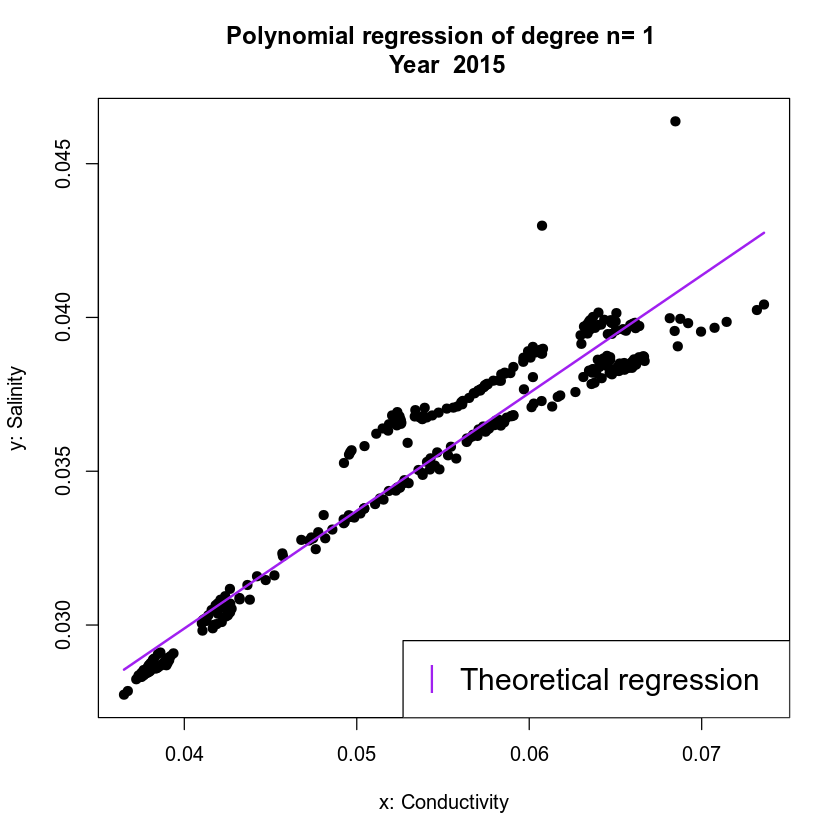

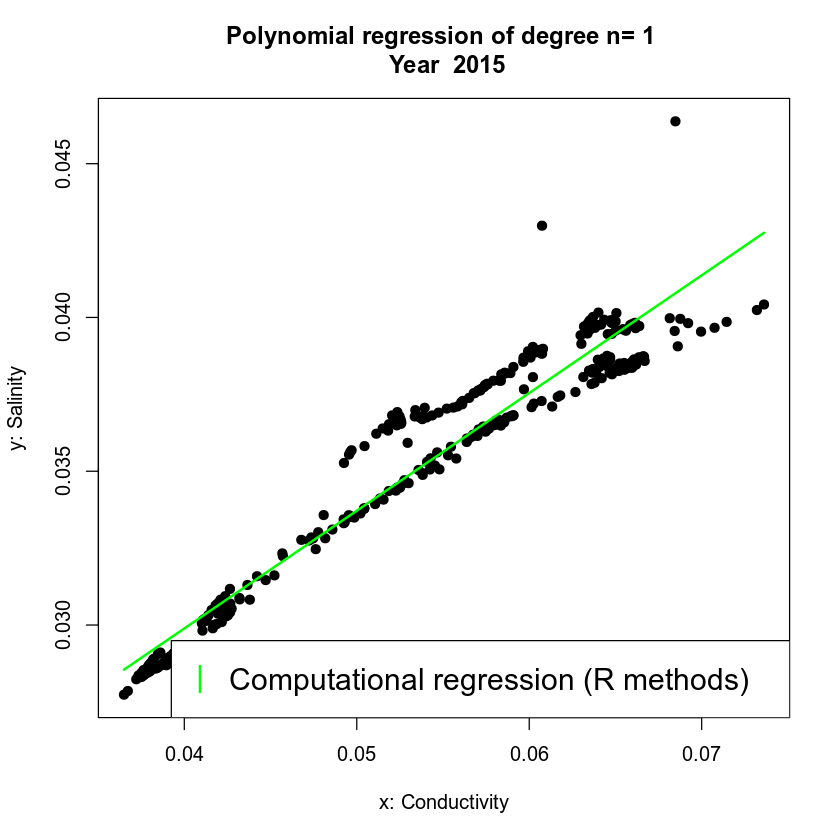

Maximum difference (theoretical - computational): 1.17961196366423e-16

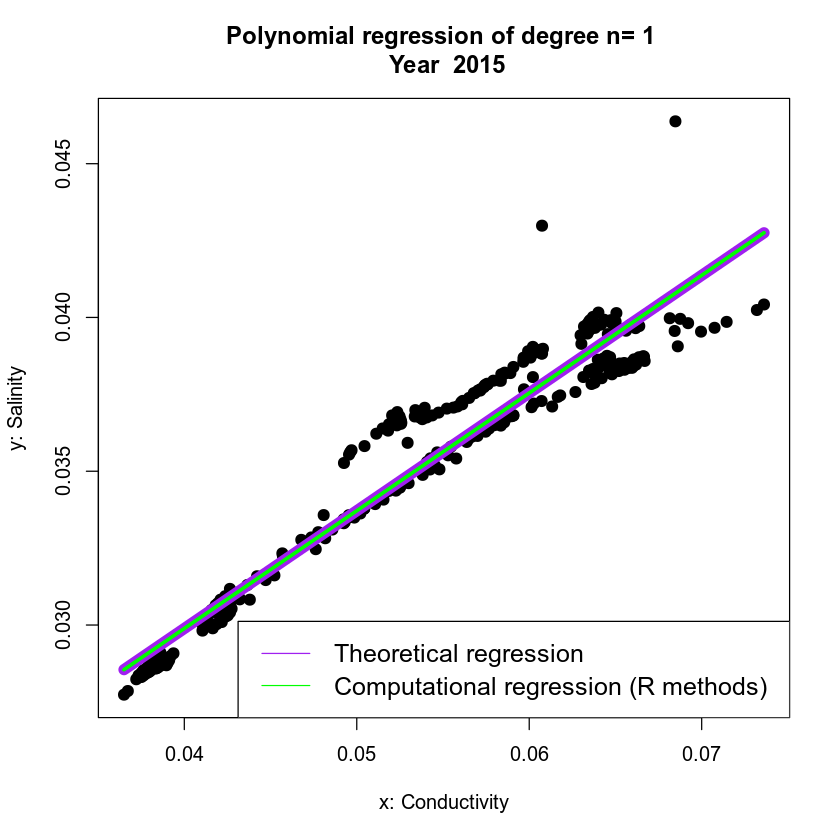

In [25]:
res_2015_1 <- regression(x_2015, y_2015 ,1)

#### 2015: regresión con polinomio de grado 2.

Coefficient 0 for x ^ 0  = -0.00371344519857685 
Coefficient 1 for x ^ 1  = 1.10876351792194 
Coefficient 2 for x ^ 2  = -6.92725462566015 
Loss function value:  0.000237632494694197

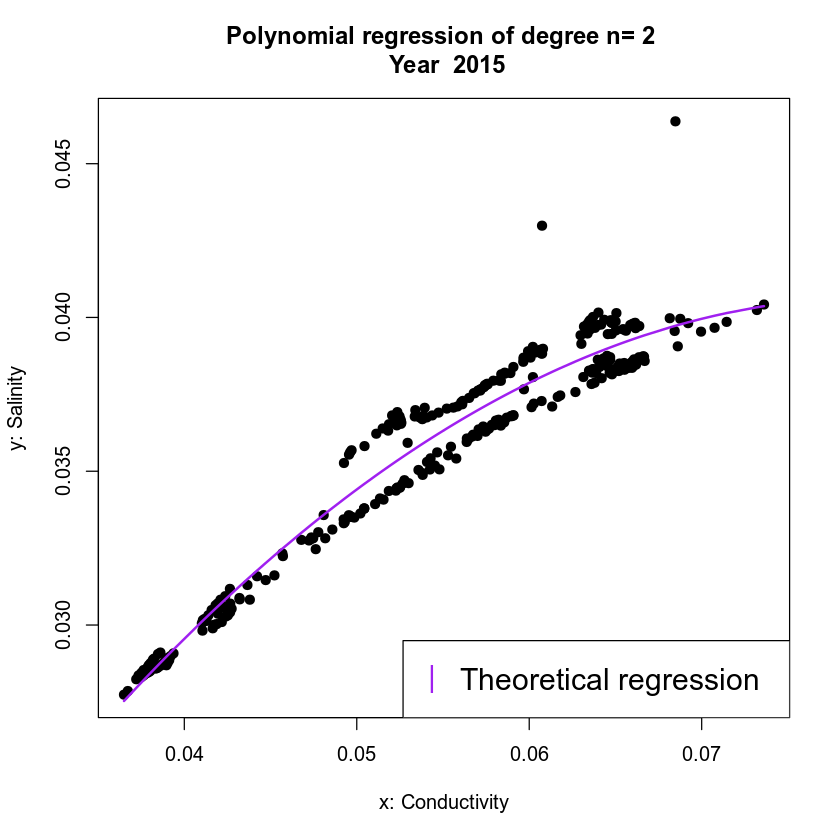

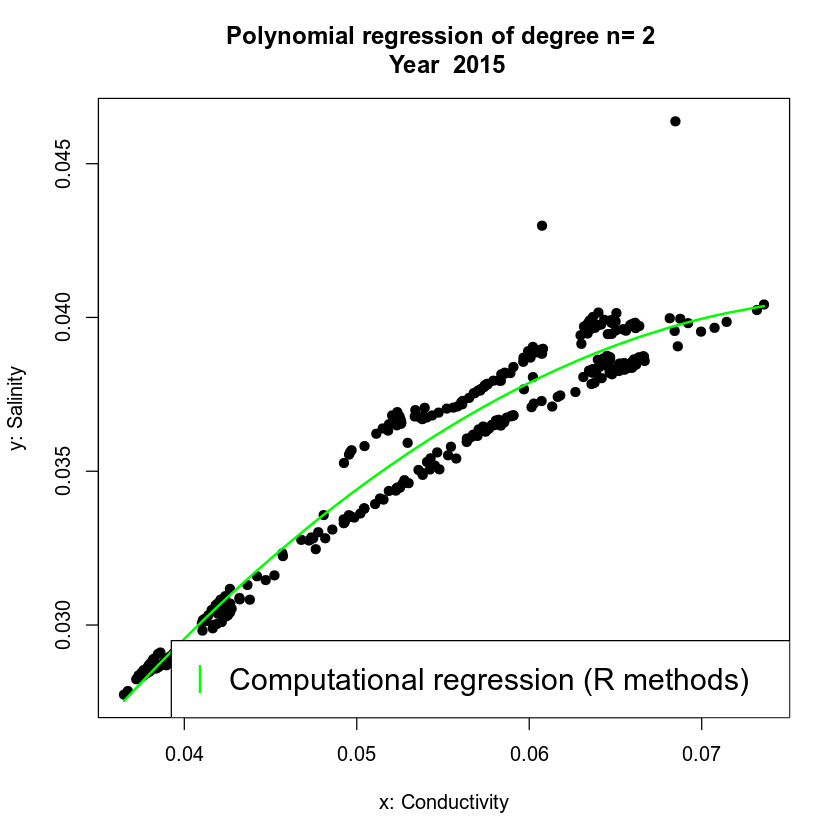

Maximum difference (theoretical - computational): 3.65124597223598e-14

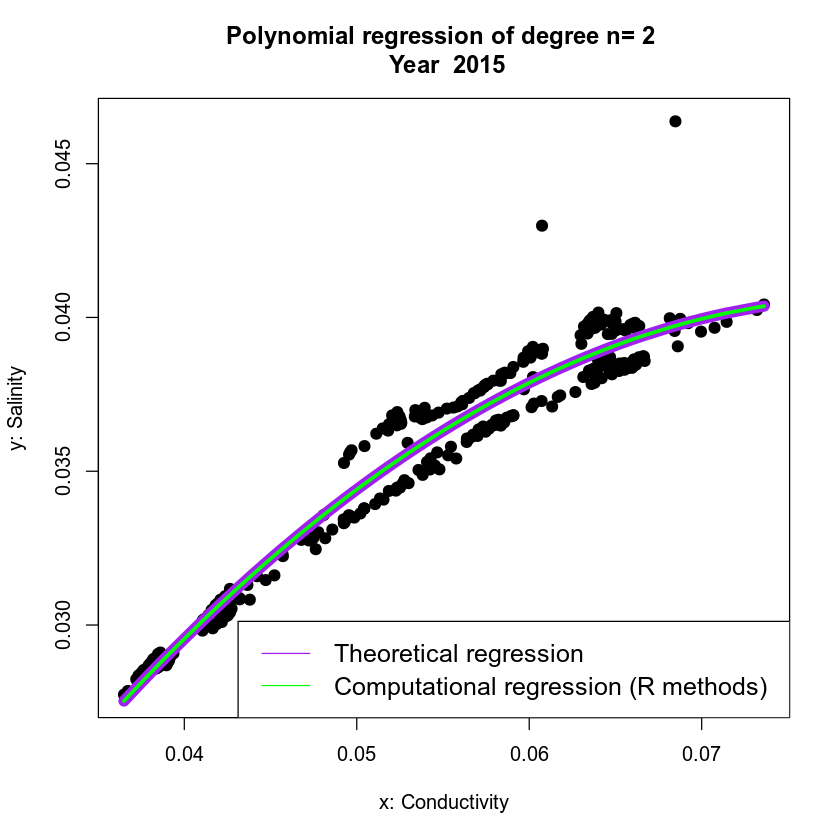

In [26]:
res_2015_2 <- regression(x_2015, y_2015, 2)

#### 2015: regresión con polinomio de grado 3.

Coefficient 0 for x ^ 0  = 0.0132103287741147 
Coefficient 1 for x ^ 1  = 0.111812457953615 
Coefficient 2 for x ^ 2  = 12.1773010912785 
Coefficient 3 for x ^ 3  = -119.462811246927 
Loss function value:  0.000235026171724456

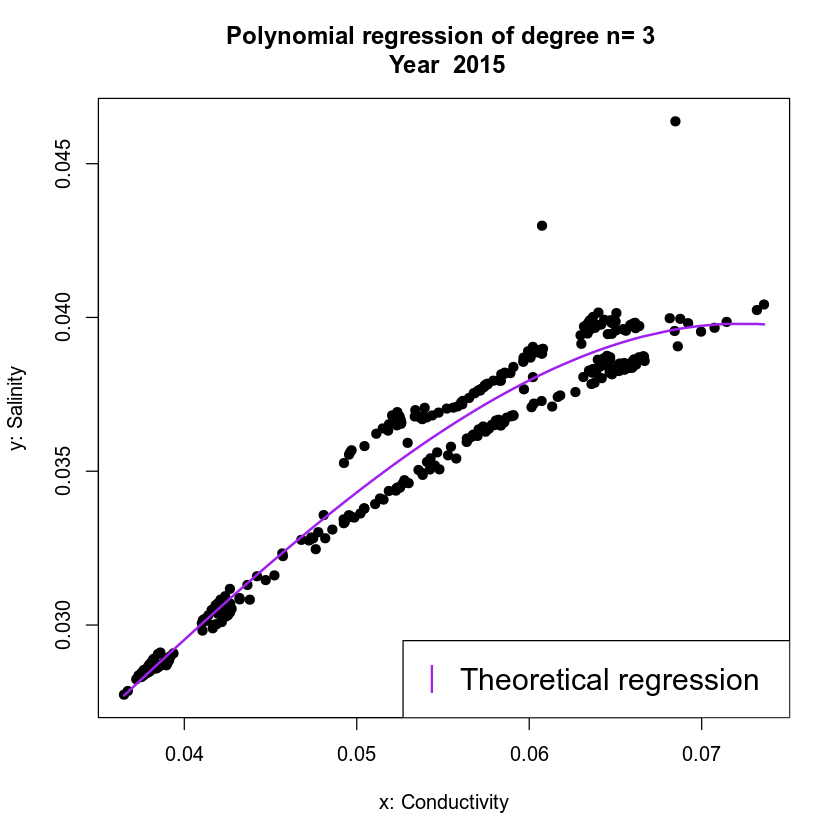

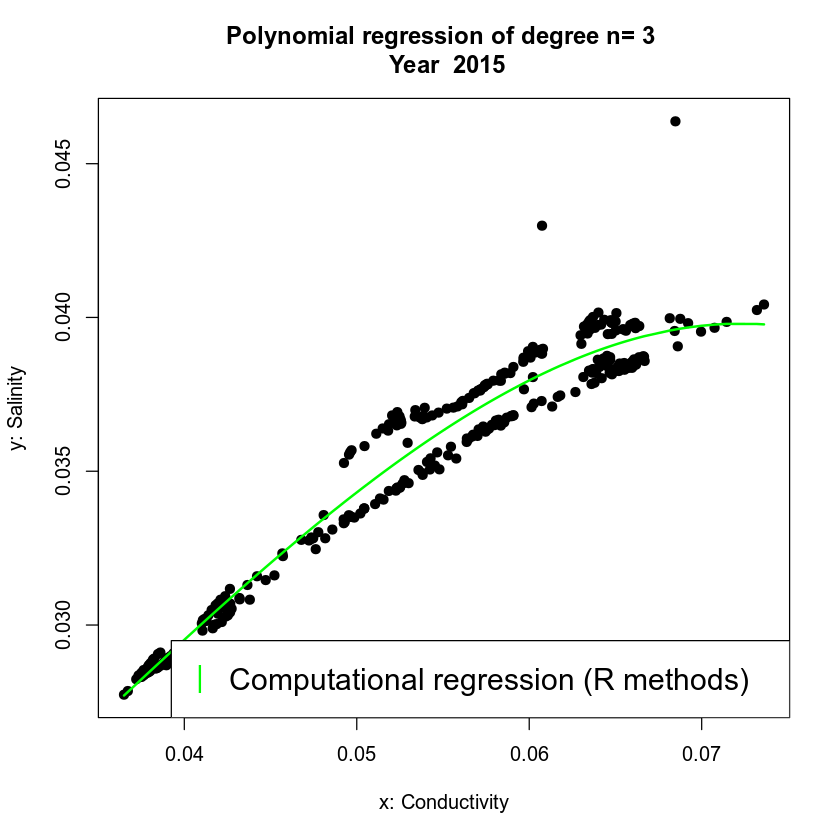

Maximum difference (theoretical - computational): -2.95637125891091e-12

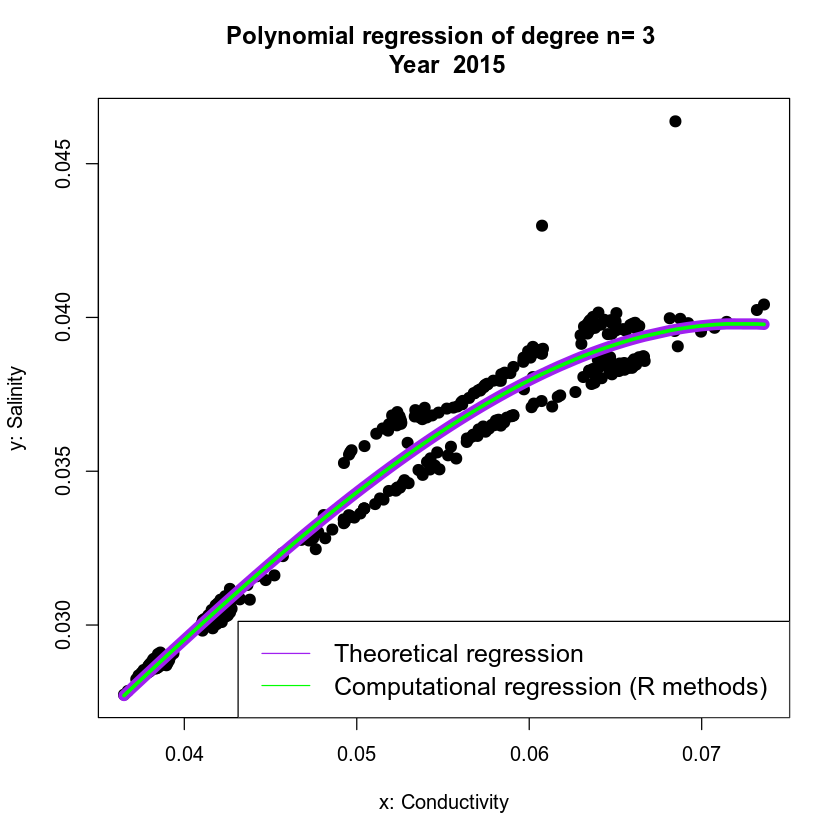

In [27]:
res_2015_3 <- regression(x_2015, y_2015, 3)

In [28]:
deg <- which.min(c(res_2015_1[[2]], res_2015_2[[2]], res_2015_3[[2]]))
print(paste('BEST METHOD: regression with polynomial of degree n=', deg))

[1] "BEST METHOD: regression with polynomial of degree n= 3"


## Comparamos el polinimio de grado 3 obtenido con los coeficientes de 2014 y el polinomio de grado 3 obtenido con los coeficientes de 2015 ambos evaluados en los puntos de 2015.

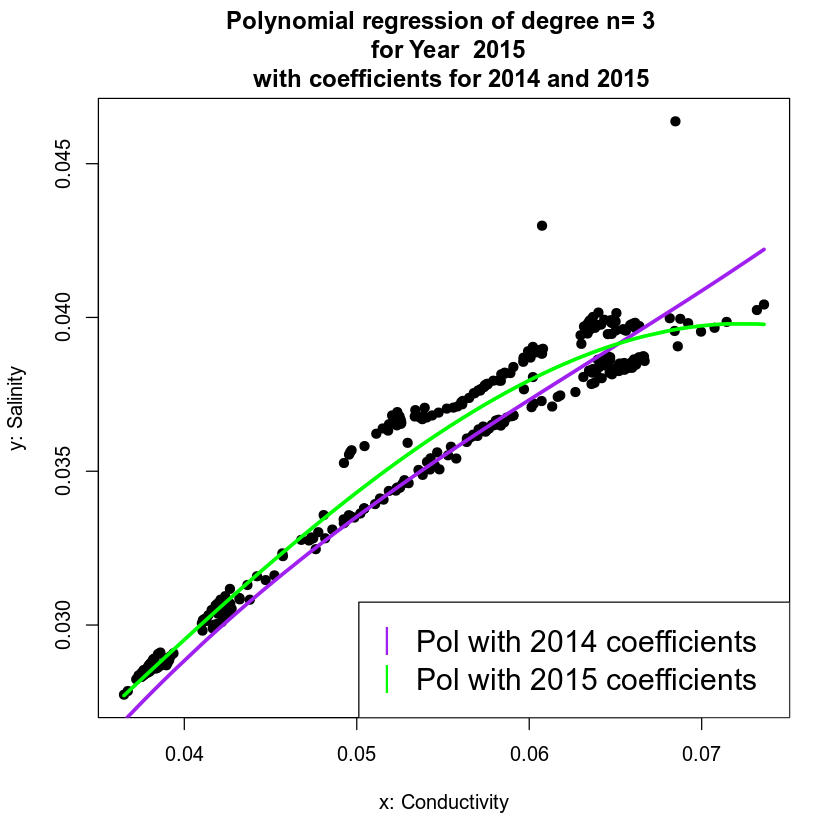

In [29]:
# Plot points for year 2015
plot(y_2015 ~ x_2015, pch = 19,
    main = paste('Polynomial regression of degree n=', 3, "\n", ' for Year ', 2015, "\n", ' with coefficients for', 2014, "and", 2015),
    xlab = 'x: Conductivity',
    ylab = 'y: Salinity')

# Plot polynomial with coefficients for the polynomial refression of degree n=3 for 2014
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2014_3[[1]])[order(x_2015)], col = 'purple', lwd = 3)     

# Plot polynomial with coefficients for the polynomial refression of degree n=3 for 2015
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2015_3[[1]])[order(x_2015)], col = 'green', lwd = 3)     


legend("bottomright", legend = c("Pol with 2014 coefficients", "Pol with 2015 coefficients"), 
           pch = "|", col = c("purple", "green"),
           cex = 1.5)

Como era de esperar, obtenemos un polinmio más ajustado en 2015.

Esto se debe a que:
* Para el plot morado, hemos empleado los coeficientes obtenidos para el polinomio de regresión de grado 3 que ha sido entrenado con los datos de 2014 y estamos evluándolo, estamos testeandolo, en los datos de 2015.
* Para el plot verde, hemos entrenado en 2015 y estamos testeando en el propio 2015.

Vemos la diferencia en la función de loss, que no es muy significativa:

In [30]:
print(paste('Loss function value for year 2015 with polynomial regression of degree 3 for 2014:', lv_2))
print(paste('Loss function value for year 2015 with polynomial regression of degree 3 for 2015:', res_2015_3[[2]]))

[1] "Loss function value for year 2015 with polynomial regression of degree 3 for 2014: 0.000374927665558949"
[1] "Loss function value for year 2015 with polynomial regression of degree 3 for 2015: 0.000235026171724456"


Si bien, obtuvmos que el modelo entrenado en 2014 que mejor se ajusta a 2015 es el poliniomio de regresión de grado n=2. Comparamos dicho modelo con el mejor de los modelos entranados y testeados en 2015, que se correspoinde con el polinomio de regresión de grado 3.

## Comparamos el polinimio de grado 2 obtenido con los coeficientes de 2014 y el polinomio de grado 3 obtenido con los coeficientes de 2015 ambos evaluados en los puntos de 2015.

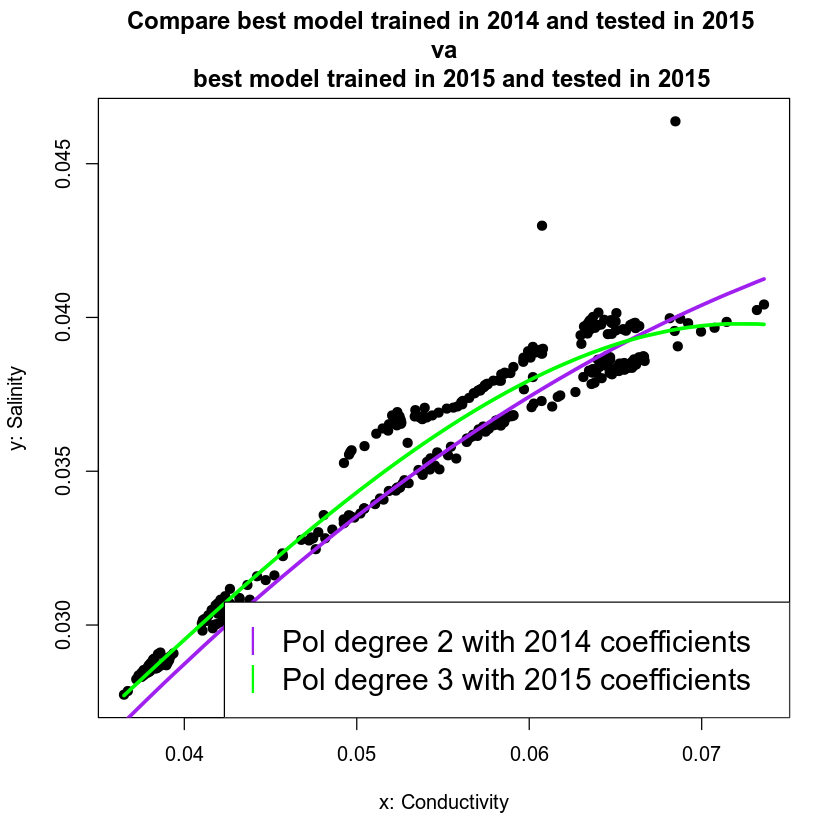

In [31]:
# Plot points for year 2015
plot(y_2015 ~ x_2015, pch = 19,
    main = paste('Compare best model trained in 2014 and tested in 2015', "\n", 'va', "\n", ' best model trained in 2015 and tested in 2015'),
    xlab = 'x: Conductivity',
    ylab = 'y: Salinity')

# Best model trained in 2014 and evaluated in 2015
# Plot polynomial with coefficients for the polynomial refression of degree n=2 for 2014
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2014_2[[1]])[order(x_2015)], col = 'purple', lwd = 3)     

# Best model trained in 2015 and evaluated in 2015
# Plot polynomial with coefficients for the polynomial refression of degree n=3 for 2015
# evaluated at 2015 points.
lines(sort(x_2015), polyval(x_2015, res_2015_3[[1]])[order(x_2015)], col = 'green', lwd = 3)     


legend("bottomright", legend = c("Pol degree 2 with 2014 coefficients", "Pol degree 3 with 2015 coefficients"), 
           pch = "|", col = c("purple", "green"),
           cex = 1.5)

In [32]:
print(paste('Loss function value for year 2015 with polynomial regression of degree 2 for 2014:', lv_2))
print(paste('Loss function value for year 2015 with polynomial regression of degree 3 for 2015:', res_2015_3[[2]]))

[1] "Loss function value for year 2015 with polynomial regression of degree 2 for 2014: 0.000374927665558949"
[1] "Loss function value for year 2015 with polynomial regression of degree 3 for 2015: 0.000235026171724456"


## Comparación de coeficientes obtenidos teóricamente vs obtenidos con `glm()`

Queremos ahora comparar los coeficientes de regresión que hemos construido teóricamente y que son devueltos por la funcion `minimize_costs_general()` con los que devuelve el método `glm()` de R.

### Estudiamos los datos de 2014.

Seleccionamos la regresión lineal para el año 2014 (`reg_2014_1`) en la que teníamos los coeficientes:

In [33]:
print(res_2014_1[[1]])

[1] 0.0111161 0.4372144


Hagamos la regresión lineal con `glm()`:

In [34]:
res_glm <- glm(y_2014 ~ x_2014)
res_glm


Call:  glm(formula = y_2014 ~ x_2014)

Coefficients:
(Intercept)       x_2014  
    0.01112      0.43721  

Degrees of Freedom: 338 Total (i.e. Null);  337 Residual
Null Deviance:	    0.008084 
Residual Deviance: 0.0001636 	AIC: -3962

Comparamos los coeficientes. Vemos que, salvo errores de redondeo, son los mismos. 

In [35]:
cat('Computational regression coefficients ')
cat(coef(res_glm))
cat('\n')
cat('Theoretical   regression coefficients ')
cat(res_2014_1[[1]])

Computational regression coefficients 0.0111161 0.4372144
Theoretical   regression coefficients 0.0111161 0.4372144

Comparamos para el polinomio de grado 2 en 2014.

En el año 2014, con la regresión mediante un polinomio de grado 2, obteníamos los coeficientes:

In [36]:
res_2014_2[1]

$reg_coeffs
[1]  0.0004311629  0.8897213244 -4.5536868200

Si practicamos la regresión con la función `glm()` de R y acedemos a sus coeficientes, obtenemos:

In [37]:
glm_2014_2 <- glm(y_2014 ~ poly(x_2014, 2))
coef(glm_2014_2)

(Intercept) poly(x_2014, 2)1 poly(x_2014, 2)2 
     0.032891649      0.088997078     -0.008245725

No coinciden. ¿A qué puede deberse? Se debe a que debemos pasarle un parámetro adicional: `raw = T`. De no hacerlo, devuelve el polinomio ortogonal. 

In [38]:
glm_2014_2 <- glm(y_2014 ~ poly(x_2014, 2, raw = T))
coef(glm_2014_2)

(Intercept) poly(x_2014, 2, raw = T)1 poly(x_2014, 2, raw = T)2 
             0.0004311629              0.8897213244             -4.5536868200

Ahora sí nos devuelven los coeficientes esperados. 

Comparemos los resultados para los años 2014, 2015 y, para cada uno de ellos, con la regresión lineal, con polinomio de grado 2 y polinomio de grado 3. Para ayudarnos, creamos la siguiente función que, similar a la anterior, calcula los coeficientes que minimizan la función de loss teóricamente y con los métodos de R; a continuación crea un dataframe con 3 columnas que muestra 1) los coeficientes obtenidos teóricamente; 2) los coeficientes obtenidos con glm; 3) booleano resultante de la comparación entre ellos.

In [39]:
coef_comparison <- function(x, y, n){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependent variable)
    # Let n be the polynomial regression degree. (if n = 1: linear function)
    # 
    # Given a regression with multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # Compare theoretical and computational (R methods) results.
    #
    # @description comparision of results for linear regression 
    #
    # @param x: numeric array. Features array. Independet variable. 
    # @param y: numeric vector. Predicted vector. Dependent variable.
    # @param n: int >= 1. Polynomial regression degree.
    #
    #
    # @return df dataframe. Data.frame to compare coefficients obtained with theoretical methods and coefficients
    # obtained with computational methods (R functions)
    
    # Exception for polynomial regressoin degree: n >= 1
    if (n < 1) {
        stop("Polynomial regression degree must be >= 1")    
    }
    
    # Features matrix.
    X <- outer(X = x, Y = 0:n, FUN =  "^")

    # Calculate regression coefficients (alphas) that minimize cost function
    alphas <- minimize_costs_general(X, y)
     
    # Regression using R methods.
    # Calculate curve with glm()
    reg_computational <- glm(y ~ poly(x, n, raw = T))
    
    # Create dataframe to compare coefficients
    df <- data.frame('theoretical_coefs' = alphas,
                     'computational_coefs' = reg_computational$coef, 
                     'bool' = alphas == reg_computational$coef)
    
    return(df)
}

### Comparamos para el año 2014:

In [40]:
for (n in c(1,2,3)){
    cat(c('Coefficientes comparison for year 2014; polynomial degree: n = ', n),  "\n", sep = "\t") 
    print(coef_comparison(x_2014, y_2014, n))
    cat("\n", "\n", "\n")
}

Coefficientes comparison for year 2014; polynomial degree: n = 	1	
                    theoretical_coefs computational_coefs  bool
(Intercept)                 0.0111161           0.0111161 FALSE
poly(x, n, raw = T)         0.4372144           0.4372144 FALSE

 
 
Coefficientes comparison for year 2014; polynomial degree: n = 	2	
                     theoretical_coefs computational_coefs  bool
(Intercept)               0.0004311629        0.0004311629 FALSE
poly(x, n, raw = T)1      0.8897213244        0.8897213244 FALSE
poly(x, n, raw = T)2     -4.5536868200       -4.5536868200 FALSE

 
 
Coefficientes comparison for year 2014; polynomial degree: n = 	3	
                     theoretical_coefs computational_coefs  bool
(Intercept)                -0.01137676         -0.01137676 FALSE
poly(x, n, raw = T)1        1.64728061          1.64728061 FALSE
poly(x, n, raw = T)2      -20.27527405        -20.27527405 FALSE
poly(x, n, raw = T)3      105.78105636        105.78105639 FALSE

 
 


### Comparamos para el año 2015:

In [41]:
for (n in c(1,2,3)){
    cat(c('Coefficients comparison for year 2015; polynomial degree: n = ', n),  "\n", sep = "\t")
    print(coef_comparison(x_2015, y_2015, n))
    cat("\n","\n","\n")
}

Coefficients comparison for year 2015; polynomial degree: n = 	1	
                    theoretical_coefs computational_coefs  bool
(Intercept)                0.01457761          0.01457761 FALSE
poly(x, n, raw = T)        0.38274376          0.38274376 FALSE

 
 
Coefficients comparison for year 2015; polynomial degree: n = 	2	
                     theoretical_coefs computational_coefs  bool
(Intercept)               -0.003713445        -0.003713445 FALSE
poly(x, n, raw = T)1       1.108763518         1.108763518 FALSE
poly(x, n, raw = T)2      -6.927254626        -6.927254626 FALSE

 
 
Coefficients comparison for year 2015; polynomial degree: n = 	3	
                     theoretical_coefs computational_coefs  bool
(Intercept)                 0.01321033          0.01321033 FALSE
poly(x, n, raw = T)1        0.11181246          0.11181246 FALSE
poly(x, n, raw = T)2       12.17730109         12.17730109 FALSE
poly(x, n, raw = T)3     -119.46281125       -119.46281124 FALSE

 
 


¿Por qué  es falsa la columna de booleanos? Probablemente por errores de redondeo de la maquina.

Podemos ampliar la función `regression()` para añadir estos resultados relativos a la comparación de coeficientes:

In [42]:
if (!require("crayon")) install.packages("crayon")
library('crayon')

Loading required package: crayon


In [43]:
regression_2 <- function(x, y, n){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependent variable)
    # Let n be the polynomial regression degree. (if n = 1: linear function)
    # 
    # Given a regression with multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # Plot and compare theoretical and computational (R methods) results
    #
    # @description comparision of results for linear regression 
    #
    # @param x: numeric array. Features array. Independet variable. 
    # @param y: numeric vector. Predicted vector. Dependent variable.
    # @param n: int >= 1. Polynomial regression degree.
    #
    #
    # @return vector. Vector containing data.frame with regressin coefficients at index 1
    # and loss functon value at index 2
    #
    
    # Exception for polynomial regressoin degree: n >= 1
    if (n < 1) {
        stop("Polynomial regression degree must be >= 1")    
    }
    
    # Extract year from variable name
    year <- strsplit( deparse(substitute(x)), split = "_")[[1]][2]
    cat(bold(red(paste("Regression for year ", year, 'with polynomial of degree ', n))))
    cat("\n", "\n")

    # Create df for plots.
    df <- data.frame(x = x, y = y)

    # Features matrix.
    # The outer product of the arrays 'X' and 'Y' 
    # with dimension c(dim(X), dim(Y)) where element 
    # A[c(arrayindex.x, arrayindex.y)] = FUN(X[arrayindex.x], Y[arrayindex.y], …).
    X <- outer(X = x, Y = 0:n, FUN =  "^")

    # Calculate regression coefficients (alphas) that minimize cost function.
    alphas <- minimize_costs_general(X, y)           

    # Calculate and print loss function value
    loss_value <- loss(X, y, alphas)
    cat(paste('Loss function value: ', loss_value))
    cat("\n", "\n")
    
    # Regression using theoretical results.
    # Evaluates polynomial with coefficients equal to the regression coefficients (alphas) at x points.
    reg_theoretical <- polyval(x, alphas)
    
    # Regression using R methods.
    # Calculate curve with glm()
    reg_computational <- glm(y ~ poly(x, n, raw = T))
    
    # Compare coefficients theoretical methods vs computational (R) methods
    df_coefs <- data.frame('theoretical_coefs' = alphas,
                           'computational_coefs' = reg_computational$coef)
    
    cat(c('Coefficients comparison for year ', year, '; polynomial degree: n = ', n),  "\n", sep = "")
    print(df_coefs)
    cat("\n", "\n")

    # Plot points
    plot(y ~ x, pch = 19,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Plot theoretical regression
    lines(sort(x), reg_theoretical[order(x)], col = 'purple', lwd = 2)     
    # Add legend
    legend("bottomright", legend = "Theoretical regression", 
           pch = "|", col = "purple",
           cex = 1.5)
    
    # Time to prepare plot
    Sys.sleep(5)
    
    # Plot points
    plot(y ~ x, pch = 19,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Plot regression curve
    lines(sort(x), fitted(reg_computational)[order(x)], col = "green", lwd = 2) 
    # Add legend
    legend("bottomright", legend = "Computational regression (R methods)", 
           pch = "|", col = "green",
           cex = 1.5)
    
    # Time to prepare plot
    Sys.sleep(5)
    
    # Plot theoretical/computational (R methods) results
    plot(y ~ x, pch = 19, cex = 1.2,
         main = paste('Polynomial regression of degree n=', n, "\n", 'Year ', year),
         xlab = 'x: Conductivity',
         ylab = 'y: Salinity')
    # Theoretical results
    lines(sort(x), reg_theoretical[order(x)], col = 'purple', lwd = 9)     
    # Results with `R` methods
    lines(sort(x), fitted(reg_computational)[order(x)], col = "green", lwd = 3) 
    # Add legend        
    legend("bottomright", legend=c("Theoretical regression", "Computational regression (R methods)"),
            col=c("purple", "green"),
            lty= 1, cex = 1.25)
    
    # Time to prepare plot
    Sys.sleep(5)
    
    # Our results where stores in variable: `reg`
    # Compare with results given by R functions: `fitted()`
    cat(paste('Maximum difference (theoretical - computational):', max(reg_theoretical - fitted(reg_computational))))
    cat("\n", "\n")
        
    return(c(data.frame(reg_coeffs = alphas), loss_value))
}

Para el año 2014:

In [44]:
#
# Trying to do:
# for (n in (1:3)){
#   invisible(regression_2(x_2014, y_2914, n))
#}
# but it's a mess. There's a problem with the pictures, they need to much time to be displayed... I tried to control it
# with Sys.sleep() but it's not working

Mostramos un único ejemplo. El resto se pueden ver quitando el commit de las celdas de más abajo:

Regression for year  2014 with polynomial of degree  1
 
Loss function value:  0.000163603320322888
 
Coefficients comparison for year 2014; polynomial degree: n = 1
                    theoretical_coefs computational_coefs
(Intercept)                 0.0111161           0.0111161
poly(x, n, raw = T)         0.4372144           0.4372144

 


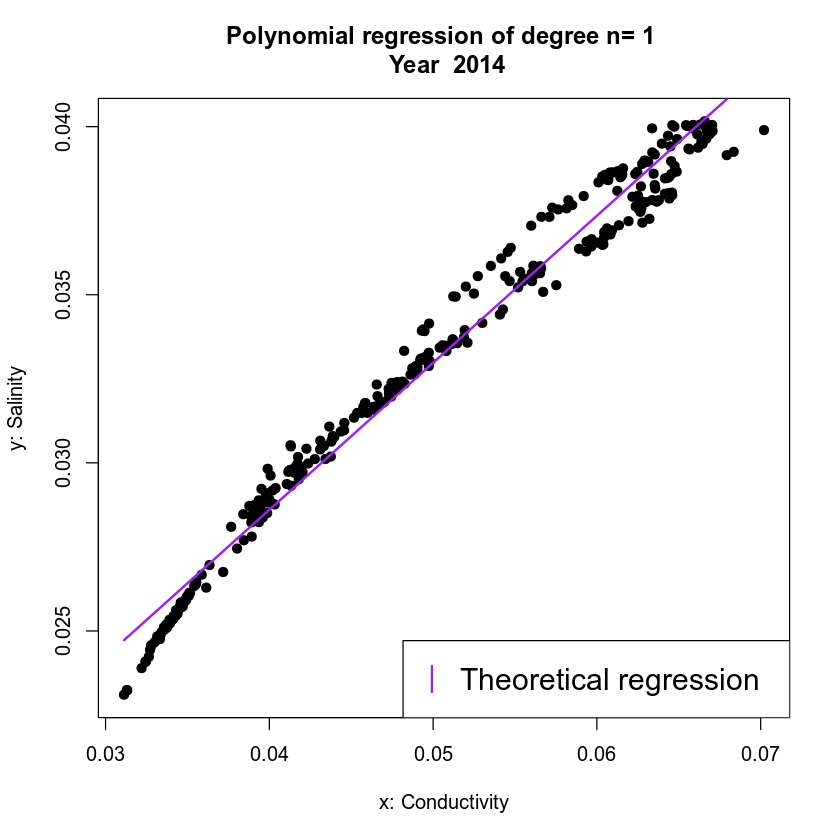

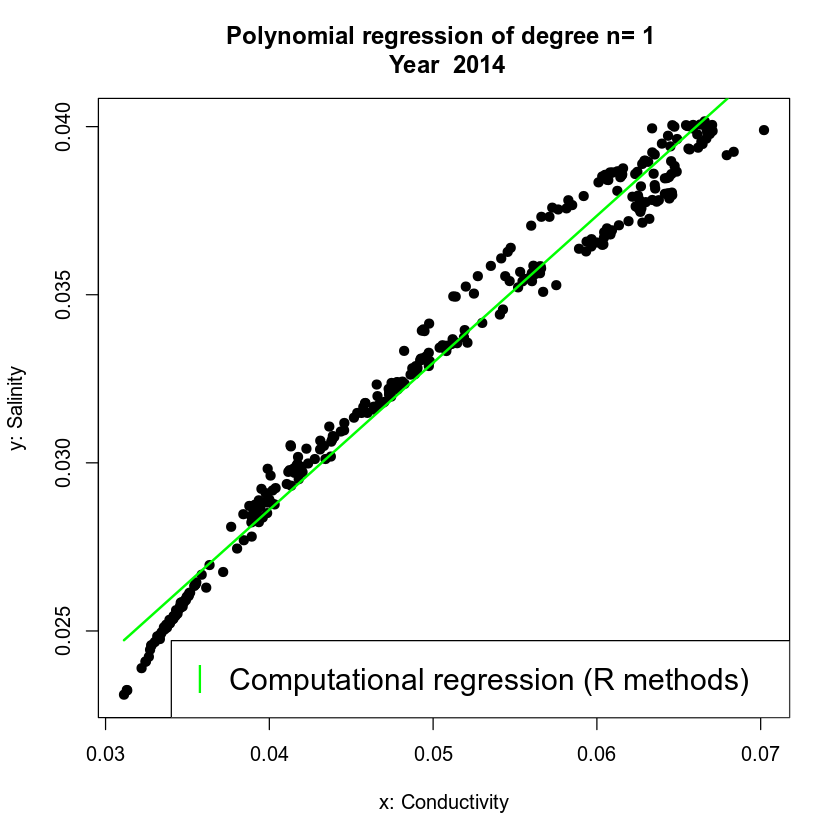

Maximum difference (theoretical - computational): 1.45716771982052e-16
 


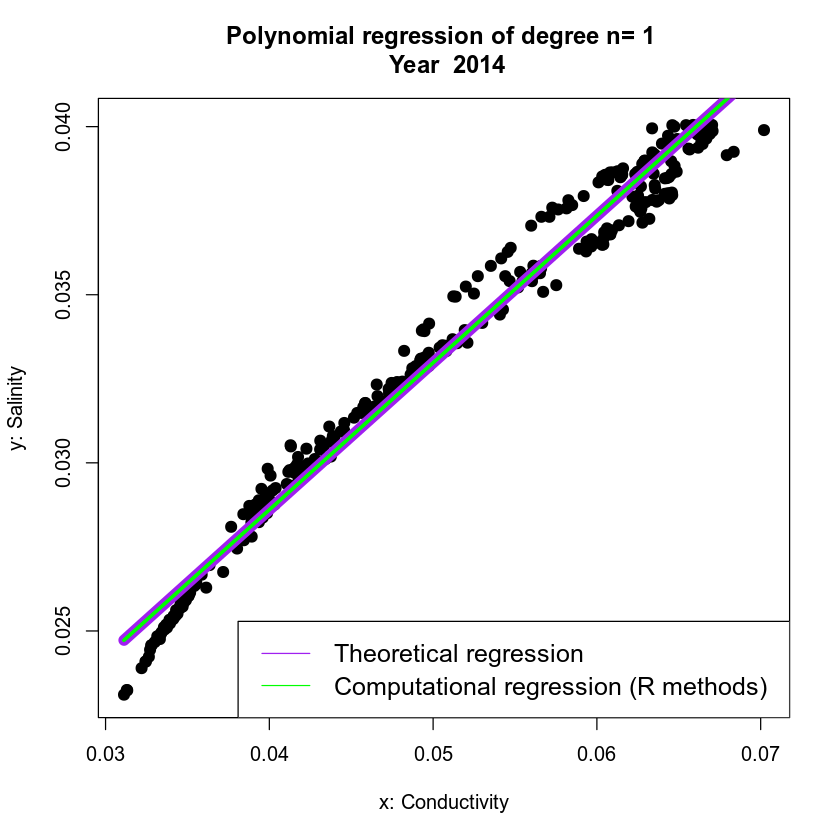

In [45]:
invisible(regression_2(x_2014, y_2014, 1))

**Uncommit next cells if desired**

In [46]:
#invisible(regression_2(x_2014, y_2014, 2))

In [47]:
#invisible(regression_2(x_2014, y_2014, 3))

Para el año 2015:

In [48]:
#invisible(regression_2(x_2015, y_2015, 1))

In [49]:
#invisible(regression_2(x_2015, y_2015, 2))

In [50]:
#invisible(regression_2(x_2015, y_2015, 3))

¿Qué pasa si hacemos n>3? Por ejemplo n=4:

In [51]:
regression_2(x_2014, y_2014, 4)

Regression for year  2014 with polynomial of degree  4
 


ERROR: Error in solve.default(t(X) %*% X): sistema es computacionalmente singular: número de condición recíproco = 6.15825e-17


Obtanemos el error *system is computationally singular*, que significa que la matriz no es invertible y por tanto no puede ser empleada para un modelo de regresión. ¿Correlación ente variables?